In [193]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('houseprice_edited.csv')  



In [194]:
data.dropna(inplace=True)

In [195]:
data

,sqrft,beds,bath,year built,last sold for $,price per sqrft,price
3,1417.0,3.0,2.0,1939.0,532000.0,677.0,959000.0
5,3814.0,4.0,4.0,1957.0,925000.0,340.0,1295000.0
6,2104.0,3.0,3.0,1992.0,236500.0,112.0,235288.0
11,1386.0,2.0,2.0,2009.0,652300.0,541.0,749900.0
12,1898.0,5.0,3.0,2014.0,256500.0,126.0,238956.0
...,...,...,...,...,...,...,...
29995,2167.0,3.0,2.0,2001.0,397500.0,245.0,530000.0
29998,1137.0,2.0,1.0,1974.0,170000.0,149.0,169900.0
30000,1720.0,3.0,2.5,1920.0,120000.0,238.0,409990.0
30001,733.0,1.0,1.0,2008.0,345000.0,409.0,300000.0


C:\Users\peter\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


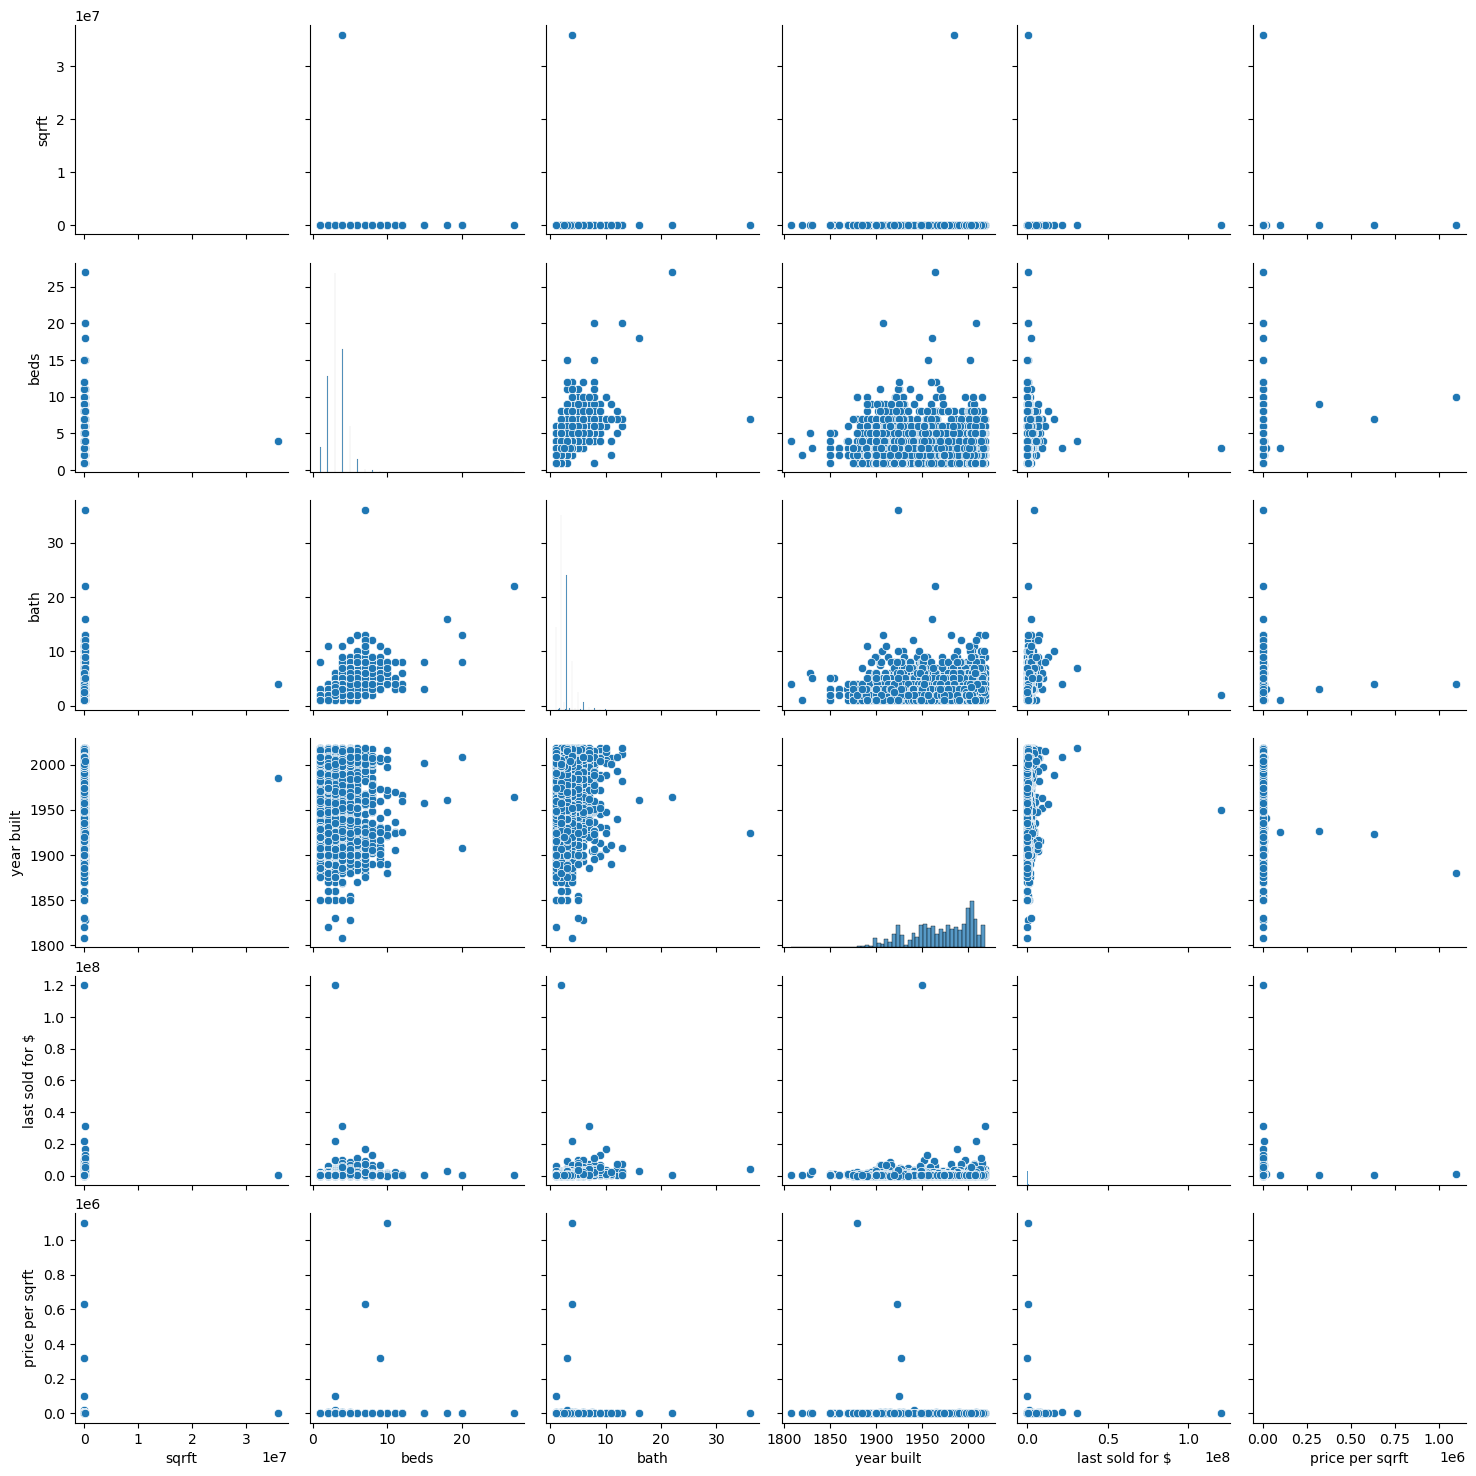

In [196]:
sns.pairplot(data, vars=['sqrft', 'beds', 'bath', 'year built', 'last sold for $', 'price per sqrft'])
plt.show()

# Linear Regression

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
X = data[['sqrft', 'beds', 'bath', 'year built', 'last sold for $', 'price per sqrft']]
y = data['price']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = regression_model.predict(X_test)

In [26]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 768965049800.1345
R-squared: 0.38659348461258025


# Logistic Regression


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [34]:
X = data[['sqrft', 'beds', 'bath', 'year built', 'last sold for $', 'price per sqrft']]
y = data['price']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [46]:
y_pred = logistic_model.predict(X_test)

C:\Users\peter\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [47]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 972731696993266.5
R-squared (R2): -801.9598420807034


# Decision Trees


In [48]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
X = data[['sqrft', 'beds', 'bath', 'year built', 'last sold for $', 'price per sqrft']]
y = data['price']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Adjust these values as needed
    'min_samples_split': [2, 5, 10],  # Adjust these values as needed
    'min_samples_leaf': [1, 2, 4]    # Adjust these values as needed
}

In [54]:
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')

In [55]:
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_decision_tree_model = DecisionTreeRegressor(random_state=42, **best_params)
best_decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=42)

In [56]:
y_pred = best_decision_tree_model.predict(X_test)

In [57]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Best Hyperparameters: {best_params}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Mean Squared Error (MSE): 263117474732.51318
R-squared (R2): 0.790110131331511


In [67]:
sample_data = pd.DataFrame({
    'sqrft': [2500, 2800, 3000],  # Sample square footage values
    'beds': [3, 4, 3],          # Sample number of bedrooms
    'bath': [2, 2.5, 3],        # Sample number of bathrooms
    'year built': [1995, 2000, 2010],  # Sample year built
    'last sold for $':[500000, 250000, 1000000],
    'price per sqrft': [200, 220, 250]  # Sample price per sqft
})

In [68]:
sample_predictions = best_decision_tree_model.predict(sample_data)


In [69]:
for i, prediction in enumerate(sample_predictions):
    print(f"Sample {i+1} Estimated Price: ${prediction:.2f}")

Sample 1 Estimated Price: $495909.50
Sample 2 Estimated Price: $582774.12
Sample 3 Estimated Price: $819250.00


In [70]:
sample_data = pd.DataFrame({
    'sqrft': [1417, 3814, 2104],  # sample data 1 = row 4
    'beds': [3, 4, 3],          # sample data 2 = row 6
    'bath': [2, 4, 3],        # Sample data 3 = row 7
    'year built': [1939, 1957, 1992],  
    'last sold for $':[532000, 925000, 236500],
    'price per sqrft': [667, 190, 112]  
})

In [71]:
sample_predictions = best_decision_tree_model.predict(sample_data)

In [72]:
for i, prediction in enumerate(sample_predictions):
    print(f"Sample {i+1} Estimated Price: ${prediction:.2f}")

Sample 1 Estimated Price: $714096.25
Sample 2 Estimated Price: $1282142.71
Sample 3 Estimated Price: $220294.91


In [75]:
import numpy as np
import matplotlib.pyplot as plt

In [78]:
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [79]:
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 263117474732.51
Root Mean Squared Error (RMSE): 512949.78
R-squared (R2): 0.79


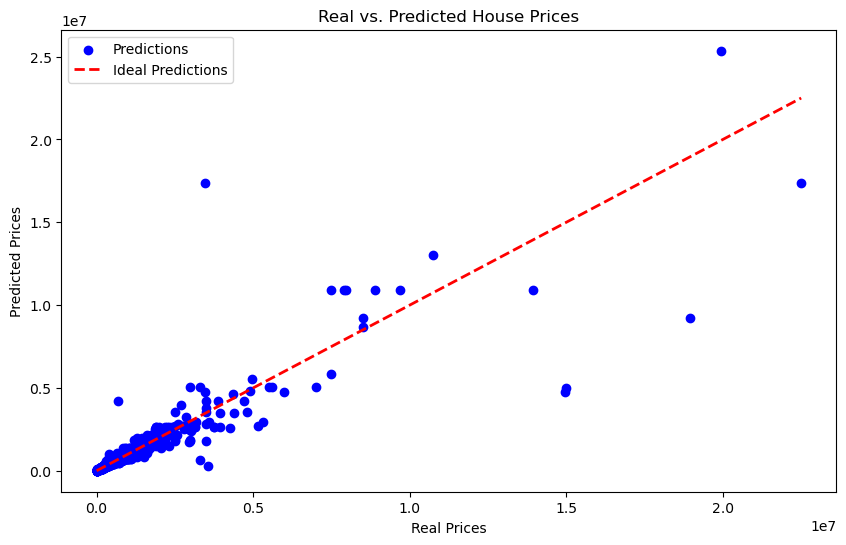

In [81]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Predictions')
plt.title('Real vs. Predicted House Prices')
plt.xlabel('Real Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

### Decision Tree is the most accurate model so far.

# Polynomial Regression

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [138]:
X = data[['sqrft', 'beds', 'bath', 'year built', 'last sold for $', 'price per sqrft']]
y = data['price']

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [140]:
poly = PolynomialFeatures(degree=2)  # You can adjust the degree
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [141]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_poly, y_train)

LinearRegression()

In [142]:
y_pred = linear_regression_model.predict(X_test_poly)

In [143]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [144]:
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')


Mean Squared Error (MSE): 657312.23
R-squared (R2): 1.00


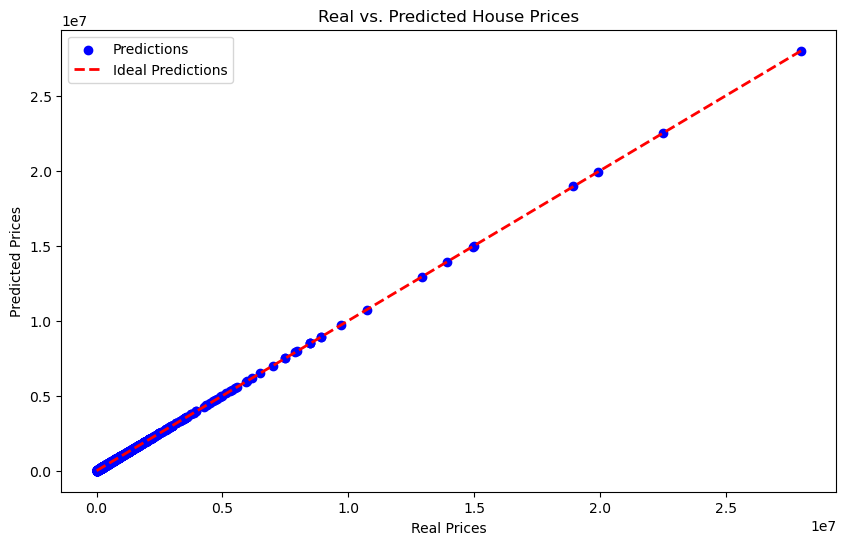

In [145]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Predictions')
plt.title('Real vs. Predicted House Prices')
plt.xlabel('Real Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

In [153]:
poly = PolynomialFeatures(degree=2)  
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [154]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_poly, y_train)

LinearRegression()

In [155]:
sample_data = pd.DataFrame({
    'sqrft': [1417, 3814, 2104],  # sample data 1 = row 4
    'beds': [3, 4, 3],          # sample data 2 = row 6
    'bath': [2, 4, 3],        # Sample data 3 = row 7
    'year built': [1939, 1957, 1992],  
    'last sold for $':[532000, 925000, 236500],
    'price per sqrft': [667, 190, 112]  
})

In [156]:
sample_data_poly = poly.transform(sample_data)

In [157]:
sample_predictions = linear_regression_model.predict(sample_data_poly)


In [158]:
for i, prediction in enumerate(sample_predictions):
    print(f"Sample {i+1} Estimated Price: ${prediction:.2f}")

Sample 1 Estimated Price: $945043.47
Sample 2 Estimated Price: $724814.77
Sample 3 Estimated Price: $235734.32


# Voting Classifiers

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [160]:
X = data[['sqrft', 'beds', 'bath', 'year built', 'last sold for $', 'price per sqrft']]
y = data['price']


In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [162]:
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [163]:
poly_regression_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

In [164]:
voting_regressor = VotingRegressor(estimators=[
    ('decision_tree', decision_tree_model),
    ('random_forest', random_forest_model),
    ('poly_regression', poly_regression_model)
])

In [165]:
voting_regressor.fit(X_train, y_train)

VotingRegressor(estimators=[('decision_tree',
                             DecisionTreeRegressor(random_state=42)),
                            ('random_forest',
                             RandomForestRegressor(random_state=42)),
                            ('poly_regression',
                             Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures()),
                                             ('linearregression',
                                              LinearRegression())]))])

In [166]:
y_pred = voting_regressor.predict(X_test)

In [167]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [168]:
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 88507536376.21
R-squared (R2): 0.93


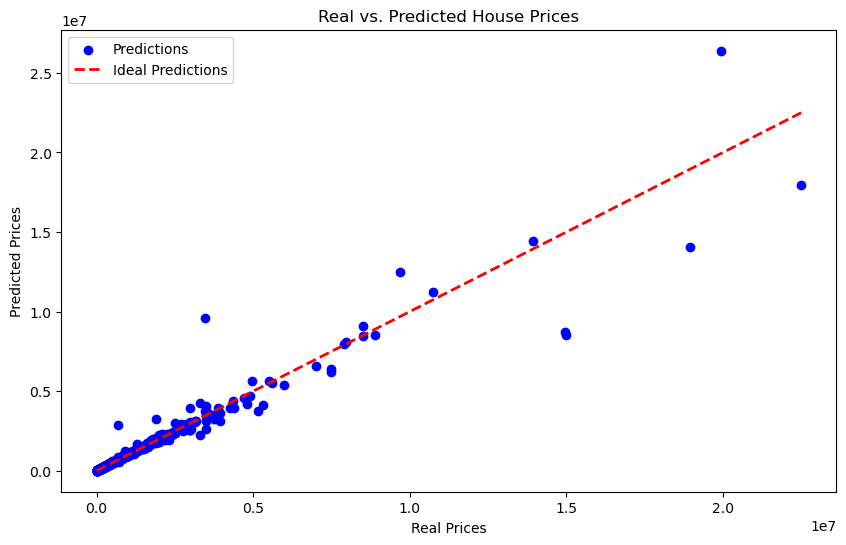

In [169]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Predictions')
plt.title('Real vs. Predicted House Prices')
plt.xlabel('Real Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

In [170]:
sample_data = pd.DataFrame({
    'sqrft': [1417, 3814, 2104],  # sample data 1 = row 4
    'beds': [3, 4, 3],          # sample data 2 = row 6
    'bath': [2, 4, 3],        # Sample data 3 = row 7
    'year built': [1939, 1957, 1992],  
    'last sold for $':[532000, 925000, 236500],
    'price per sqrft': [667, 190, 112]  
})

In [179]:
sample_predictions = voting_regressor.predict(sample_data)

In [172]:
for i, prediction in enumerate(sample_predictions):
    print(f"Sample {i+1} Estimated Price: ${prediction:.2f}")

Sample 1 Estimated Price: $952508.40
Sample 2 Estimated Price: $919190.63
Sample 3 Estimated Price: $235605.69


# Clustering

In [181]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

In [174]:
X = data[['price']] #select the price colum for feature of clustering this will group houses for the teams to work on

In [182]:
k_values = range(1, 11)

In [184]:
wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Set n_init explicitly
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

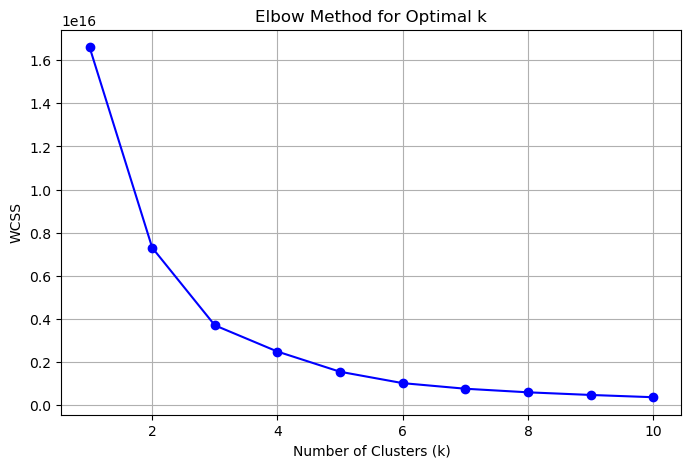

In [185]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

4 looks the most optimal so there should be 4 teams working on 4 groups of houses

In [186]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt


In [187]:
X = data[['price']]

In [188]:
k = 4

In [189]:
kmeans = KMeans(n_clusters=k, random_state=42)

In [190]:
kmeans.fit(X)

C:\Users\peter\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [191]:
data['cluster'] = kmeans.labels_

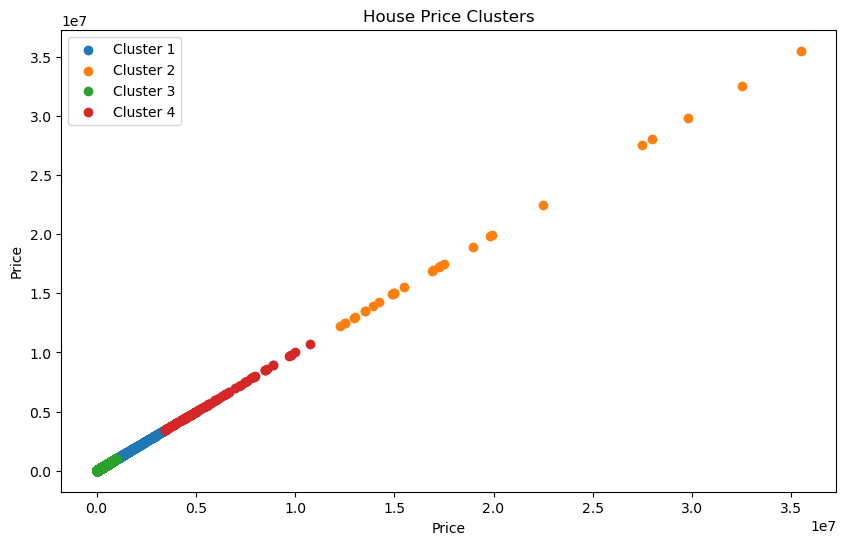

In [192]:
plt.figure(figsize=(10, 6))
for cluster in range(k):
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data['price'], cluster_data['price'], label=f'Cluster {cluster + 1}')

plt.title('House Price Clusters')
plt.xlabel('Price')
plt.ylabel('Price')
plt.legend()
plt.show()

# To improve models performance


In [ ]:
In order to improve the models performance i think that additional information such as 